In [1]:
import pandas as pd
df = pd.read_csv('https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/classification/data/recipes.csv')
df['is_indian'] = (df.cuisine == "indian").astype(int)
df.head()

,cuisine,id,ingredient_list,is_indian
0,greek,10259,"romaine lettuce, black olives, grape tomatoes,...",0
1,southern_us,25693,"plain flour, ground pepper, salt, tomatoes, gr...",0
2,filipino,20130,"eggs, pepper, salt, mayonaise, cooking oil, gr...",0
3,indian,22213,"water, vegetable oil, wheat, salt",1
4,indian,13162,"black pepper, shallots, cornflour, cayenne pep...",1


In [2]:
df['is_indian'].value_counts()

0    36771
1     3003
Name: is_indian, dtype: int64

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(df.ingredient_list)
X = matrix
y = df['is_indian']
from sklearn.model_selection import train_test_split
from collections import Counter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 25727, 1: 2114})
Testing target statistics: Counter({0: 11044, 1: 889})


In [8]:
pip install scikit-plot

oversample the dataset

In [20]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")



Training target statistics: Counter({0: 25727, 1: 25727})
Testing target statistics: Counter({0: 11044, 1: 889})


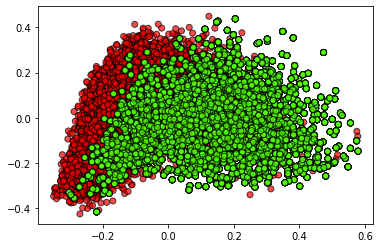

Precision score 0.744908896034298
Recall score 0.78177727784027
F1-score score 0.7628979143798025
Accuracy score 0.9637978714489231


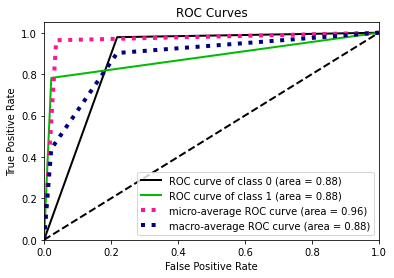

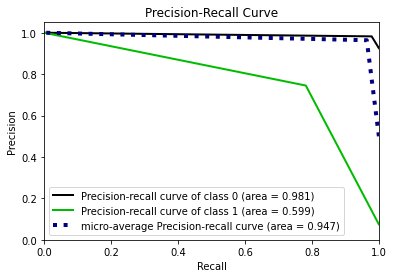

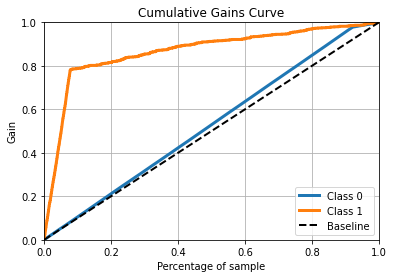

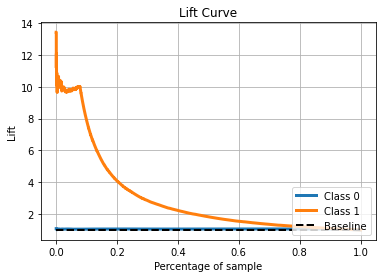

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11044
           1       0.74      0.78      0.76       889

    accuracy                           0.96     11933
   macro avg       0.86      0.88      0.87     11933
weighted avg       0.96      0.96      0.96     11933



In [13]:
roc_auc_ros,fpr_ros,tpr_ros, _ = build_and_test(X_res, X_test, y_res, y_test)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

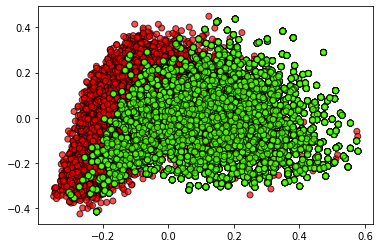

Precision score 0.7478165938864629
Recall score 0.7705286839145107
F1-score score 0.7590027700831025
Accuracy score 0.9635464677784296


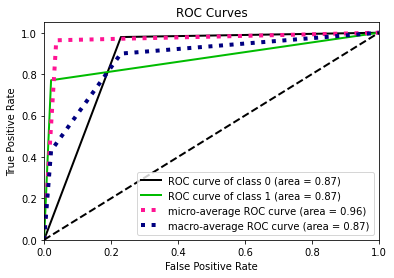

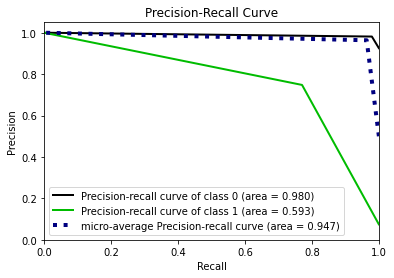

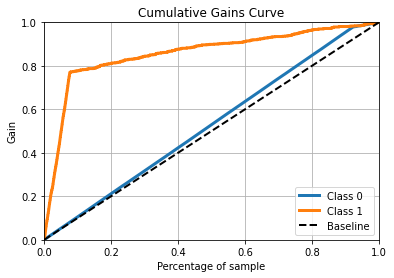

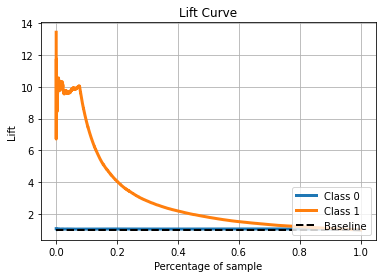

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11044
           1       0.75      0.77      0.76       889

    accuracy                           0.96     11933
   macro avg       0.86      0.87      0.87     11933
weighted avg       0.96      0.96      0.96     11933



In [14]:
roc_auc_ros,fpr_ros,tpr_ros, _ = build_and_test(X_res, X_test, y_res, y_test)

undersampling


In [15]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
X_res, y_res = under_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 2114, 1: 2114})
Testing target statistics: Counter({0: 11044, 1: 889})


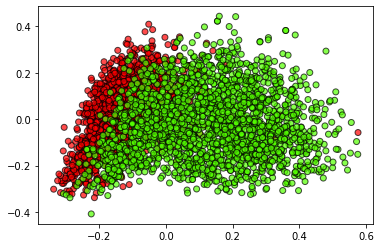

Precision score 0.45786516853932585
Recall score 0.9167604049493814
F1-score score 0.6107156238291496
Accuracy score 0.9129305287857202


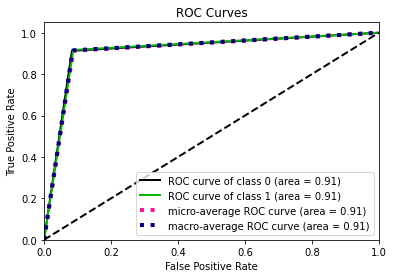

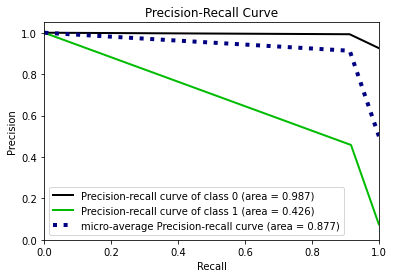

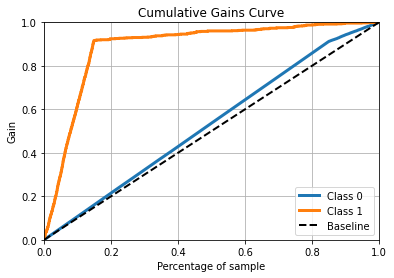

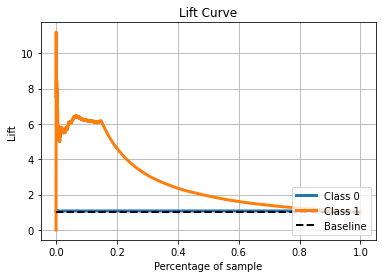

              precision    recall  f1-score   support

           0       0.99      0.91      0.95     11044
           1       0.46      0.92      0.61       889

    accuracy                           0.91     11933
   macro avg       0.73      0.91      0.78     11933
weighted avg       0.95      0.91      0.93     11933



In [16]:
roc_auc_rus,fpr_rus,tpr_rus , _ = build_and_test(X_res, X_test, y_res, y_test)

class weight

In [17]:
n= Counter(y_train)
ratio = int(n[0]/n[1])
ratio, n

(12, Counter({0: 25727, 1: 2114}))

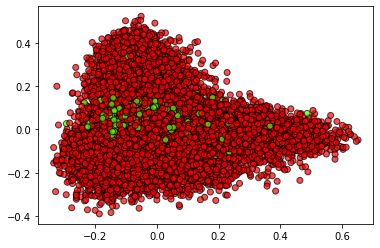

Precision score 0.741585233441911
Recall score 0.7682789651293588
F1-score score 0.7546961325966851
Accuracy score 0.9627922567669488


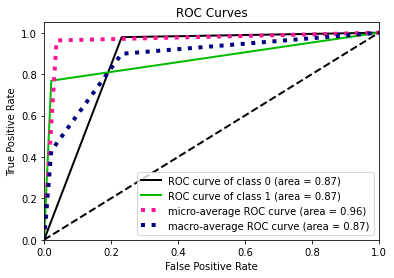

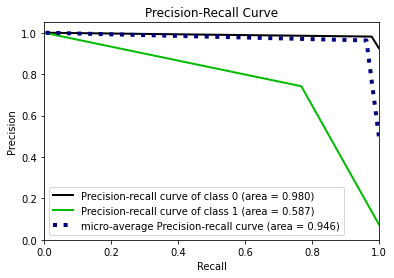

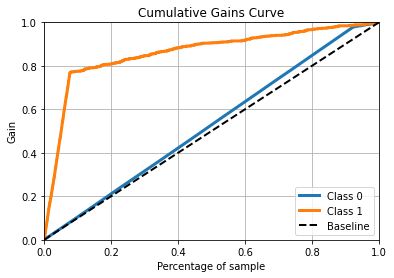

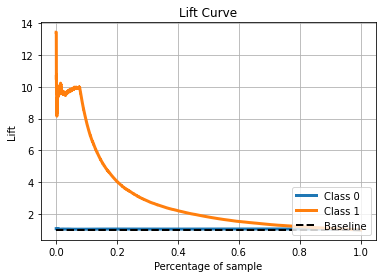

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11044
           1       0.74      0.77      0.75       889

    accuracy                           0.96     11933
   macro avg       0.86      0.87      0.87     11933
weighted avg       0.96      0.96      0.96     11933



In [18]:
roc_auc_cw,fpr_cw,tpr_cw, _  = build_and_test(X_train, X_test, y_train, y_test, class_weight={0:1, 1:ratio})

threshold:

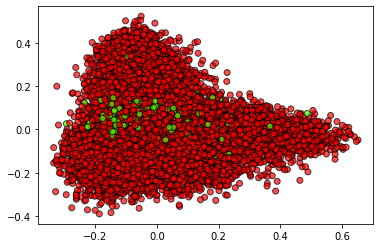

Precision score 0.8076036866359447
Recall score 0.7885264341957255
F1-score score 0.7979510529311327
Accuracy score 0.9702505656582586


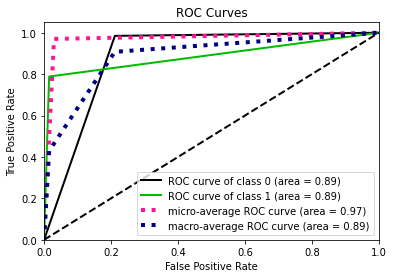

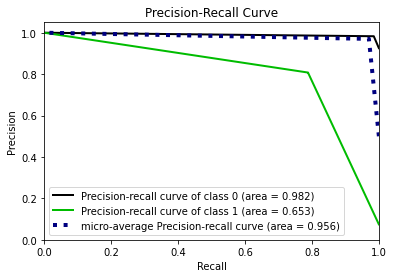

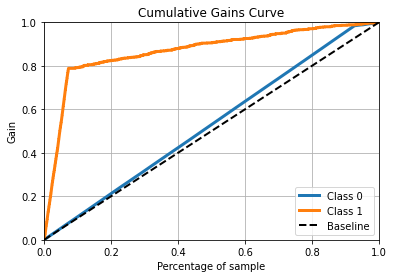

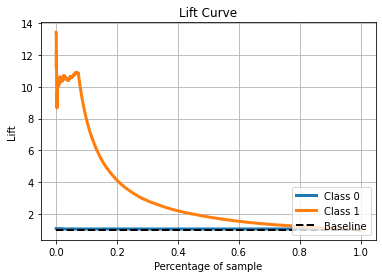

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11044
           1       0.81      0.79      0.80       889

    accuracy                           0.97     11933
   macro avg       0.90      0.89      0.89     11933
weighted avg       0.97      0.97      0.97     11933

Best Treshold: 1.0


In [19]:
roc_auc_thr,fpr_thr,tpr_thr, threshold = build_and_test(X_train, X_test, y_train, y_test, threshold=True)
print(f"Best Treshold: {threshold}")